https://www.kaggle.com/aaron7sun/stocknews

## <font color='darkblue'>Première section</font>
Dans cette section nous aurons à présenter les données en notre disposition, nous aurons également à nétoyer la base (pre-processing), pour cela importe les packages nécessaire.

In [1]:
#First section
'''In this section we will have to present the data at our disposal, we will also have to clean the database 
(pre-processing), for this purpose we will import the necessary packages.'''

'In this section we will have to present the data at our disposal, we will also have to clean the database \n(pre-processing), for this purpose we will import the necessary packages.'

In [2]:
import pandas as pd
import numpy as np
import re
import string
import nltk
nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jeane\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jeane\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.  Downloading wordcloud-1.8.0-cp38-cp38-win_amd64.whl (159 kB)



In [6]:
from wordcloud import WordCloud

In [8]:
## importer la base
news_djia = pd.read_csv("D:/for_mooc_report/129_792900_compressed_Combined_News_DJIA/Combined_News_DJIA.csv", header = 0 ,sep=",")

## Description 
La base est constituée des tops 25 titres de journaux de la chaîne Reddit WorldNews Channel  selon les votes des utilisateurs de Reddit. Elle couvre la période du 08 août 2008 au 1er juillet 2016, cela fait 1989 observations (sachant que la bourse est ouvrable 5/7 jours). Il y a donc 27 colonnes, la première est celle de la date, la seconde indique si l'indice du Dow Jones Industrial Average (DJIA), a augmenté ou baisser à la fermeture par rapport au jour précédent. 

**Il s'agira principalement de pouvoir prédire si au vu des 25 titres l'indice boursier augmentera ou diminuera.**
Pour cela 
 - Notre échantillon de base va du 08/08/2008 to 31/12/2014 et l'échantillon test va du 01/01/2015 au 01/07/2016,    comme le recommande l'auteur de la base
 - La métrique d'évaluation est l'AUC de la courbe ROC
 - Nous utiliserons les réseaux RNN et quelques algorithmes du machine learning 

In [8]:
news_djia.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [9]:
news_djia.tail(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1987,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...
1988,2016-07-01,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates urge Greenpeace to stop o...,Brazil: Huge spike in number of police killing...,Austria's highest court annuls presidential el...,"Facebook wins privacy case, can track any Belg...",...,"The United States has placed Myanmar, Uzbekist...",S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...


In [10]:
len(news_djia)

1989

In [9]:
##shift the columns Date and Label to make that the today label is aligned with the previous day news headlines
news_djia['Label'] = news_djia.Label.shift(-1)
news_djia['Date'] = news_djia['Date'].shift(-1)
news_djia.drop(news_djia.index[len(news_djia)-1], inplace=True)

In [10]:
news_djia.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-11,1.0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-12,0.0,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-13,0.0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-14,1.0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-15,1.0,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and

In [12]:
len(news_djia)

1988

In [13]:
##8 ième titre le plus votés par les utilisateurs
news_djia.iloc[0,10]

"b'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]'"

In [12]:
## There is the character b\' which returns several times, we are going to get rid of it in the whole database.
news_djia = news_djia.replace('b\"|b\'|\\\\|\\\"', '', regex=True)

In [13]:
##convert the label column into integer, it have been changed to float during the shift
news_djia["Label"] = news_djia["Label"].astype(int)

In [14]:
#news_djia.head(3)
news_djia.tail()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1983,2016-06-27,0,David Cameron to Resign as PM After EU Referendum,BBC forecasts UK votes to Leave the European U...,Nicola Sturgeon says a second independence ref...,It's official. Britain votes to leave the Euro...,World's Largest Tibetan Buddhist Institute Ord...,Not a single place in Scotland voted to leave ...,Rich Getting Richer at the Expense of the Poor...,Spanish minister calls for Gibraltar to be ret...,...,Sinn Fein calls for a referendum on Irish reun...,$70 billion wiped off the Australian sharemark...,Nigel Farage disowns Vote Leave '350m for the ...,Top EU leader: we want Britain out as soon as ...,Nigel Farage: 350 million pledge to fund the N...,Thousands of London banking job cuts to start ...,Google says there was a large spike in searche...,EU referendum; Gibraltar backs Remain with 94%...,"After Brexit, U.K. Residents Google 'What Is T...",A Turkish man has been found guilty of insulti...
1984,2016-06-28,1,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,...,German lawyers to probe Erdogan over alleged w...,Boris Johnson says the UK will continue to int...,Richard Branson is calling on the UK governmen...,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don't wan...,Conservative MP Leave Campaigner: The leave ca...,"Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...
1985,2016-06-29,1,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",S&amp;P cuts United Kingdom sovereign credit r...,Huge helium deposit found in Africa,CEO of the South African state broadcaster qui...,"Brexit cost investors $2 trillion, the worst o...",Hong Kong democracy activists call for return ...,Brexit: Iceland president says UK can join 'tr...,...,"US, Canada and Mexico pledge 50% of power from...",There is increasing evidence that Australia is...,"Richard Branson, the founder of Virgin Group, ...","37,000-yr-old skull from Borneo reveals surpri...",Palestinians stone Western Wall worshipers; po...,Jean-Claude Juncker asks Farage: Why are you h...,Romanians for Remainians offering a new home t...,Brexit: Gibraltar in talks with Scotland to st...,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual...
1986,2016-06-30,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,Devastated: scientists too late to captive bre...,British Labor Party leader Jeremy Corbyn loses...,A Muslim Shop in the UK Was Just Firebombed Wh...,Mexican Authorities Sexually Torture Women in ...,UK shares and pound continue to recover,...,"Escape Tunnel, Dug by Hand, Is Found at Holoca...",The land under Beijing is sinking by as much a...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...
1987,2016-07-01,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship t

In [15]:
##define a function to remove undesirable characters

def clean_text(column_text):
    
    # voir des types de caractères comme [PICS] dans news_djia.iloc[895,27], [VIDEO] dans news_djia.iloc[2,27]
    column_text = column_text.apply(lambda x: re.sub('\[[^\]]*\]', '',x))

    # enlever les parenthèses :voir news_djia.iloc[2,27] pour (video),des url comme CNN.com ou **.co.uk
    column_text = column_text.apply(lambda x: re.sub('\w*.co.uk*|BBC*|NEWS*|BBC News*|Reuters BBC News*|Reuters*|ABC News*|\w*\.com*|\([^\]]*\)','', x))

    #enlever les tirets en double ou triple voir news_djia.iloc[14,27] pour remarquer
    column_text = column_text.apply(lambda x: re.sub('\-',' ',x))

    #enlever les pipes | pour remarquer 
    column_text = column_text.apply(lambda x: re.sub('\|','',x))
    
    ##remplacer US ou U.S. ou U.S.A. par america,  voir dans le news_djia.iloc[2,27] pour remarquer
    column_text = column_text.apply(lambda x: re.sub('US*|U\.S\.A\.*|USA','america',x))
    
    ##remplacer UK ou U.K. par britain, voir news_djia.iloc[89,27] pour remarquer
    column_text = column_text.apply(lambda x: re.sub('UK*|U\.K\.','britain',x))
    
    ##enlever les caractères \n par britain, voir news_djia.iloc[966,27] pour remarquer
    column_text = column_text.apply(lambda x: re.sub(r"\n",'',x))
    
    ##enlever les URL
    column_text = column_text.apply(lambda x: re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b','',x))
    
    ##remplacer UN ou U.N. par united nations, voir news_djia.iloc[89,27] pour remarquer
    column_text = column_text.apply(lambda x: re.sub('UN*|U\.N\.','united nations',x))
   
    return column_text

In [17]:
##convert to string , before appying the defined function
for i in (news_djia.columns[2:27]):
    news_djia[i] = news_djia[i].astype(str)

In [18]:
for i in (news_djia.columns[2:27]):
    news_djia[i] = clean_text(news_djia[i])

Une fois les caractères indésirables nétoyés des titres, il faut ensuite rendre miniscule, former une liste de mot de chaque titre (tokenizer), enlever les signes de ponctuation et les caractères non alphabétiques, puis enfin enlever les stopwords

In [19]:
##lowercase, form a word list of each title (tokenize), remove punctuation marks and non-alphabetic characters,
##and finally remove stopwords

def final_data(x):

        tokens = word_tokenize(x)  ## tokenizer
        tokens = [w.lower() for w in tokens] ## rendre miniscule
        table = str.maketrans('', '', string.punctuation) ## enlever la ponctuation
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()] ##enlever les chiffres par exemples
        words = [word for word in words if word not in stopwords.words('english')] ## enlever les stopwords anglais
        text = " ".join(words)
        return text
    
def reclean_column(column_text):
    column_text = column_text.apply(lambda x: final_data(x)) 
    return column_text

In [20]:
##apply the function
for i in (news_djia.columns[2:27]):
    news_djia[i] = reclean_column(news_djia[i])

$Note :$
Dans la toute la suite nous allons rassembler, l'ensemble des 25 titres dans une seule et même colonne, cela permettra de nous concentrer sur une colonne spécifique : `combined_news`

In [21]:
#gather the 25 news headlines in a single column
news_djia['combined_news'] = None
for i in range(len(news_djia)):
    news_djia.iloc[i,27] = ' '.join(str(x) for x in news_djia.iloc[i,2:27]) ## la colonne combined_news est la 28ème

In [22]:
news_djia.iloc[2,27]

'remember adorable year old sang opening ceremonies fake russia ends georgia operation sexual harassment would children al qaeda losing support iraq brutal crackdown activities regards un islamic including women buying cucumbers ceasefire georgia putin outmaneuvers west microsoft intel tried kill xo laptop stratfor russo georgian war balance power trying get sense whole georgia russia war vote americap think georgia started think russia america military surprised timing swiftness russian military move south ossetia still trying sort happened america defense official said monday americas beats war drum iran dumps dollar gorbachev georgian military attacked south ossetian capital tskhinvali multiple rocket launchers designed devastate large areas cnn use footage tskhinvali ruins cover georgian report beginning war olympics opening violates ancient tradition truce conflict games ioc could respond taking games away russia pyramids large luxor stacked mega city pyramid tokyo bay top party c

In [24]:
news_djia.loc[1605:1610,'Date'].values.tolist() ## 1610 correspond à l'indice de la date 31/12/2014

['2014-12-24',
 '2014-12-26',
 '2014-12-29',
 '2014-12-30',
 '2014-12-31',
 '2015-01-02']

In [26]:
news_djia.loc[1987:1988,'Date']

1987    2016-07-01
Name: Date, dtype: object

In [23]:
##select all news headlines associated respectively with an increase in the DJIA index and a decrease
X_djia_up =  news_djia[news_djia["Label"]==1]['combined_news'].tolist() 
X_djia_down = news_djia[news_djia["Label"]==0]['combined_news'].tolist() 

##form the train and test sets by selecting news headlines in the period 2008-08-08 to 2014-12-31, and 2015-01-01 to 2016-07-01
###initialize
X_train = pd.DataFrame()
X_test = pd.DataFrame()

X_train['combined_news'] = news_djia[news_djia['Date'] < '2015-01-01']['combined_news'] ## selectionner l'ensemble des titres de 08/08/2008 au 31/12/2014   
X_test['combined_news'] = news_djia[news_djia['Date'] > '2014-12-31']['combined_news'] ## selectionner l'ensemble des titres de 01/01/2015 au 01/07/2016

Y_train = np.reshape(np.array(news_djia[news_djia['Date'] < '2015-01-01']['Label'],dtype="float64"), (len(X_train),1))
Y_test =  np.reshape(np.array(news_djia[news_djia['Date'] > '2014-12-31']['Label'],dtype="float64"), (len(X_test),1))

##do the following when instead of pooling, we use each column
'''
for i in (news_djia.columns[2:27]):
    X_train[i] = news_djia[news_djia['Date'] < '2015-01-01'][i]   
    X_test[i] = news_djia[news_djia['Date'] > '2014-12-31'][i] 
'''
print(len(X_train))
print(len(X_test))

1610
378


In [24]:
## gather in into a single text all the texts contained in X_djia_up
djia_up_list = []
for sentence in X_djia_up:
    e = sentence.split()
    djia_up_list.append(e)
djia_up_list = [j for sub in djia_up_list for j in sub]

## gather in into a single text all the texts contained in X_djia_down
djia_down_list = []
for sentence in X_djia_down:
    f = sentence.split()
    djia_down_list.append(f)
djia_down_list = [j for sub in djia_down_list for j in sub]

In [25]:
len(djia_up_list)

309209

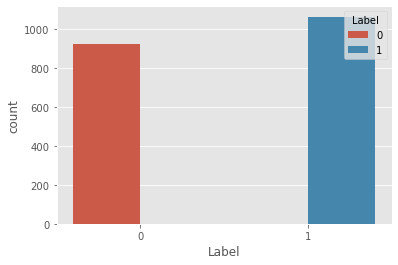

In [26]:
##bar plot of Label variable
plt.style.use('ggplot')
sns.countplot(x='Label', hue='Label', data=news_djia)
plt.savefig("fall0_rise1.PNG")

In [27]:
##classes size
print(news_djia["Label"].tolist().count(0))
print(news_djia["Label"].tolist().count(1))

923
1065


In [33]:
from collections import Counter

In [34]:
##count number of each word in djia_up_list and in djia_down_list
djia_up_counter = Counter(djia_up_list)
djia_down_counter = Counter(djia_down_list)

djia_up_top_30_words = pd.DataFrame(djia_up_counter.most_common(30), columns=['word', 'count'])
djia_down_top_30_words = pd.DataFrame(djia_down_counter.most_common(30), columns=['word', 'count'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

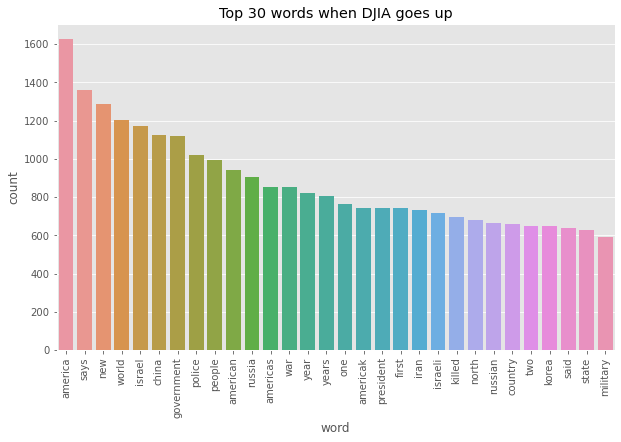

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', data=djia_up_top_30_words, ax=ax)
plt.title('Top 30 words when DJIA goes up')
plt.xticks(rotation='vertical')

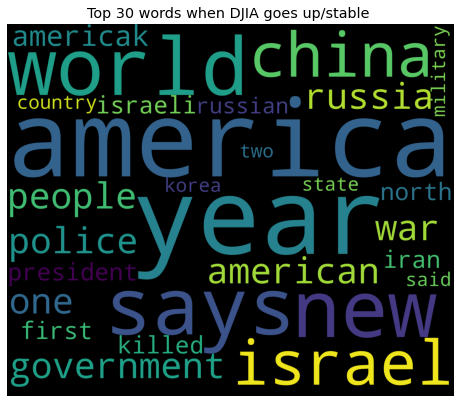

In [36]:
##word cloud of the when DJIA goes up/stable
wordcloud1 = WordCloud(background_color='black', width=3000, height=2500).generate(' '.join(djia_up_top_30_words.word.tolist()))                     
plt.figure(1,figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Top 30 words when DJIA goes up/stable ")
plt.show()            
wordcloud1.to_file("rise_stable_djia.png")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

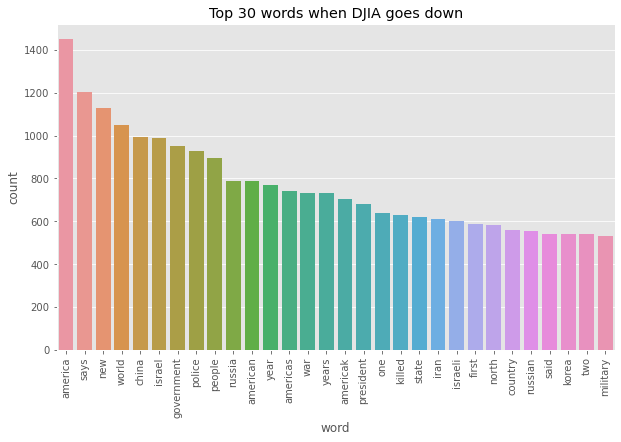

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', data=djia_down_top_30_words, ax=ax)
plt.title('Top 30 words when DJIA goes down')
plt.xticks(rotation='vertical')

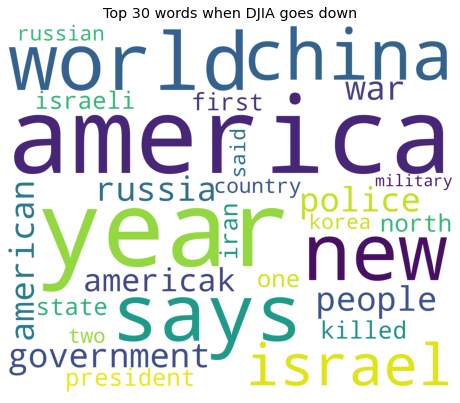

In [38]:
##word cloud of the when DJIA goes goes down
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(' '.join(djia_down_top_30_words.word.tolist()))                     
plt.figure(1,figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Top 30 words when DJIA goes down")
plt.show()            
wordcloud2.to_file("down_djia.png")

## <font color='darkblue'>Second section</font>

In [ ]:
#Second section : developp the RNN model

In [ ]:
##we need to install VC_redist.x64 on the computer

In [ ]:
pip install tensorflow

In [40]:
pip install keras

In [28]:
import tensorflow as tf
import keras 
from keras.preprocessing.text import Tokenizer
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Activation, Bidirectional, Dense, Input, LSTM,GRU, Embedding, Dropout,Concatenate,Flatten
from keras.layers.normalization import BatchNormalization
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.initializers import glorot_uniform
from keras.optimizers import Adam
from keras.layers.core import Flatten
from keras.utils import to_categorical
import keras.metrics
from keras.layers.merge import Concatenate
from sklearn.metrics import roc_curve

ModuleNotFoundError: No module named 'tensorflow'

In [42]:
##tokenize the entire text in the coulmn combined_news
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(news_djia['combined_news'].values)

In [43]:
len(X_train.columns)

1

if we want to use each column, ratcher than pool them together

In [44]:
''' if we want to use each column, ratcher than pool them together
##transform the the columns of data frame into lists, in this code we have consider the case where the 25 columns
## are used
X_train_general_list = []
X_test_general_list = []

for i in range(len(X_train.columns)):
    a = X_train.iloc[:,i].tolist()
    X_train_general_list.append(a)

    b = X_test.iloc[:,i].tolist()
    X_test_general_list.append(b)    

##vectorize  text corpus, by turning each text into a sequence of integers 
X_train_general_seq = []
X_test_general_seq = []

for i in range(len(X_train.columns)):
    c = tokenizer_obj.texts_to_sequences(X_train_general_list[i])
    X_train_general_seq.append(c)

    d = tokenizer_obj.texts_to_sequences(X_test_general_list[i])
    X_test_general_seq.append(d)    
'''

In [ ]:
#check the content of X_train_general_list
X_train_general_list

In [45]:
'''
maxtrain =[]
for i in range(len(X_train.columns)):
    maxi_a = max([len(sent_vec) for sent_vec in X_train_general_seq[i]]),
    maxtrain.append(maxi_a)         
    
maxtest =[]
for i in range(len(X_test.columns)):
    maxi_b = max([len(sent_vec) for sent_vec in X_test_general_seq[i]]),
    maxtest.append(maxi_b)   

maxLen = max(max(maxtrain),max(maxtest))
'''

In [47]:
'''
X_train_general_pad=[]
X_test_general_pad=[]

for i in range(len(X_train.columns)):
    e = pad_sequences(X_train_general_seq[i], maxlen=39, padding='post')
    X_train_general_pad.append(e)
    
    f = pad_sequences(X_test_general_seq[i], maxlen=39, padding='post')
    X_test_general_pad.append(f)

print(X_test_general_pad[0].shape[1])
'''

use the gathered one

In [55]:
##if we use the whole of the 25 news in a time
##transform into list
X_train_general_list = X_train['combined_news'].tolist()
X_test_general_list = X_test['combined_news'].tolist()

In [56]:
#research among all the combined new headlines of each date the one which has the largest number of words, 
##this will serve to determine the dimension of the embedding layer
max_length = max(max([len(s.split()) for s in X_train_general_list]),max([len(s.split()) for s in X_test_general_list]))
max_length

456

In [57]:
#define vocabulary size
vocab_size = len(tokenizer_obj.word_index)+1

In [58]:
## tokenize, and assign a number to each word.
X_train_general_seq = tokenizer_obj.texts_to_sequences(X_train_general_list) 
X_test_general_seq= tokenizer_obj.texts_to_sequences(X_test_general_list)

In [59]:
##since all sentences don't have the same length, we pad them until with 0 so tht all the sentences will be 
##as long as the sentence which has the largest number of words
X_train_general_pad = pad_sequences(X_train_general_seq, maxlen=max_length, padding = 'post')
X_test_general_pad = pad_sequences(X_test_general_seq, maxlen=max_length, padding = 'post')

Pour traiter des données textuelles, nous avons du words embedding, c'est à dire une représentation vectorielle des mots dans espace multidimentionel. 
* On peut soit utiliser un dictionnaire de mots, où le travail du word embedding  à été déjà fait et on peut directement utiliser ce dictionnaire dans notre modèle, 

* ou soit on peut faire faire à notre modèle la vectorisation des mots (plongement lexical) en utilsant dans le cas des réseaux de neurone, une couche dédiée à cela (Embedding layer)

Nous avons priviligié la première option, car elle permet de gagner du temps. Sur : https://www.kaggle.com/watts2/glove6b50dtxt nous avons téléchargé un dictionnaire de mot, chaque mot est représenter par un vecteur de 50 dimensions, qui sont ces caractéristiques, obtenues par l'algorithme de word embedding Glove. Il y 400000 mots anglais , dans le disctionnaire


In [48]:
##import a pretrained Glove for word embedding via https://www.kaggle.com/thanakomsn/glove6b300dtxt
##and create the dictionary that will contain each word and its vector

embeddings_index = {}
f = open('D:/5504_8240_compressed_glove_6B_300d_txt/glove_6B_300d.txt',encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [49]:
not_present_list = [] ## create a empty list, it will keep the words which are in our vocabulary of the data and  not in the glove dictionnayr

vocab_size = len(tokenizer_obj.word_index) + 1  # adding 1 to fit Keras embedding (requirement)

print('Loaded %s word vectors.' % len(embeddings_index))

embedding_matrix = np.zeros((vocab_size, len(embeddings_index['no']))) ## initialize the embeddind matrix of shape (2169,300) to 0

for word, i in tokenizer_obj.word_index.items():    ## we browser whole of couples (word , index) that exist in the vocabulary of the data
    if word in embeddings_index.keys(): ## if the word which is in our vocabulary is in glove dictionnary, take its embedding vector
        embedding_vector = embeddings_index.get(word) 
    else:
        not_present_list.append(word)   ##else, add the word to the not_present_list, its embedding vector is None for the moment 
    if embedding_vector is not None:    ## set the embedding vector of word in the embedding matrix
        embedding_matrix[i] = embedding_vector
    else:
        embedding_matrix[i] = np.zeros(300) ## the embedding vector for unknown words, is 0


Loaded 400000 word vectors.


39

In [74]:
##Build the model 
model_rnn = Sequential()
##embedding layer
model_rnn.add(Embedding(name="embed_layer", input_dim = vocab_size, 
                       output_dim=len(embeddings_index['patato']),weights=[embedding_matrix], 
                       input_length=max_length,trainable=False))
##first layer of lstm
model_rnn.add(LSTM(units = 120,return_sequences= True))
##apply a batch normalization
model_rnn.add(BatchNormalization())
##second layer of lstm
model_rnn.add(LSTM(units = 64, return_sequences= False))
##apply a batch normalization
model_rnn.add(BatchNormalization())
##sigmoid layer
model_rnn.add(Dense(units = 1,activation ='sigmoid'))

model_rnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed_layer (Embedding)      (None, 456, 300)          10092000  
_________________________________________________________________
lstm_8 (LSTM)                (None, 456, 120)          202080    
_________________________________________________________________
batch_normalization_5 (Batch (None, 456, 120)          480       
_________________________________________________________________
lstm_9 (LSTM)                (None, 64)                47360     
_________________________________________________________________
batch_normalization_6 (Batch (None, 64)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 10,342,241
Trainable params: 249,873
Non-trainable params: 10,092,368
____________________________________

In [75]:
##compile the model 
model_rnn.compile(loss="binary_crossentropy", metrics=['acc',keras.metrics.AUC()], optimizer=Adam(0.01))

Maintenant nous pouvons entrainer le modèle pour l'apprentissage. Le modèle (lstm_classify) prend comme entrée un tableau de formes (m, max_len) et donne en sortie les vecteurs de probabilité de la forme (m, 1). Il faut donc convertir X_train (liste de phrases sous forme de chaînes de caractères) à X_train_indices (tableau de phrases comme liste d'indices de mots). On aura Y_train l'ensemble les étiquettes 0 ou 1

In [76]:
##fit the model
hist_rnn=model_rnn.fit(X_train_general_pad ,Y_train,validation_data=(X_test_general_pad,Y_test), epochs = 75, batch_size=32,shuffle=True)

Epoch 1/75
51/51 [==============================] - 39s 758ms/step - loss: 0.6950 - acc: 0.5391 - auc_5: 0.4873 - val_loss: 0.7010 - val_acc: 0.4921 - val_auc_5: 0.5000
Epoch 2/75
51/51 [==============================] - 42s 833ms/step - loss: 0.6914 - acc: 0.5422 - auc_5: 0.4912 - val_loss: 0.8222 - val_acc: 0.4921 - val_auc_5: 0.5000
Epoch 3/75
51/51 [==============================] - 42s 818ms/step - loss: 0.6964 - acc: 0.5342 - auc_5: 0.4964 - val_loss: 0.9124 - val_acc: 0.5079 - val_auc_5: 0.5255
Epoch 4/75
51/51 [==============================] - 41s 795ms/step - loss: 0.7067 - acc: 0.5124 - auc_5: 0.4896 - val_loss: 0.6931 - val_acc: 0.5079 - val_auc_5: 0.5000
Epoch 5/75
51/51 [==============================] - 50s 971ms/step - loss: 0.6911 - acc: 0.5416 - auc_5: 0.5033 - val_loss: 0.7693 - val_acc: 0.4921 - val_auc_5: 0.5000
Epoch 6/75
51/51 [==============================] - 48s 932ms/step - loss: 0.6906 - acc: 0.5435 - auc_5: 0.4776 - val_loss: 0.6941 - val_acc: 0.5079 - val_

In [77]:
##keep in mind the keys values of this dictionary in order to use the correct name, they are used in the plotting.
hist_rnn.history

{'loss': [0.6949607729911804,
  0.6914290189743042,
  0.6964253187179565,
  0.706666111946106,
  0.6911012530326843,
  0.6905913352966309,
  0.689669668674469,
  0.6911958456039429,
  0.6895254850387573,
  0.6893332004547119,
  0.689787745475769,
  0.6898752450942993,
  0.6897686123847961,
  0.6896254420280457,
  0.6893589496612549,
  0.690184473991394,
  0.6899615526199341,
  0.6902682781219482,
  0.6920800805091858,
  0.6908931136131287,
  0.6896751523017883,
  0.6906803250312805,
  0.6891266703605652,
  0.6895935535430908,
  0.6891464591026306,
  0.6890149116516113,
  0.6892162561416626,
  0.6893672943115234,
  0.6888230443000793,
  0.6896856427192688,
  0.6915259957313538,
  0.6892957091331482,
  0.6886187195777893,
  0.6898519396781921,
  0.6900258660316467,
  0.6894662976264954,
  0.6897197961807251,
  0.6906700134277344,
  0.6902083158493042,
  0.690359354019165,
  0.6899321675300598,
  0.689536988735199,
  0.688433051109314,
  0.6892759203910828,
  0.6894581317901611,
  0.68949

<Figure size 576x576 with 0 Axes>

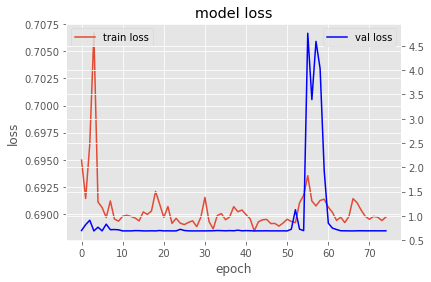

In [81]:
##plot the cost evolution 
plt.figure(figsize=(8,8))

fig,axloss1 = plt.subplots()
axloss2 = axloss1.twinx()
axloss1.plot(hist_rnn.history['loss'])
axloss2.plot(hist_rnn.history['val_loss'],color='b')
axloss1.set_title('model loss')
axloss1.set_ylabel('loss')
axloss1.set_xlabel('epoch')
axloss1.legend(['train loss'], loc='upper left')
axloss2.legend(['val loss'], loc='upper right')
plt.savefig("loss_rnn.PNG")
plt.show()

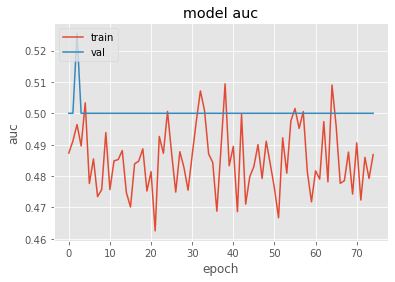

In [84]:
plt.plot(hist_rnn.history['auc_5'])
plt.plot(hist_rnn.history['val_auc_5'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("auc_rnn.PNG")
plt.show()

In [86]:
##for the RNN model roc curve
loss_rnn, acc_rnn, auc_rnn = model_rnn.evaluate(X_test_general_pad,Y_test)
print()
print("RNN accuracy: %0.3f " % (acc_rnn))
print("RNN AUC: %0.3f " % (auc_rnn))

12/12 [==============================] - 4s 299ms/step - loss: 0.6953 - acc: 0.5079 - auc_5: 0.5000

RNN accuracy: 0.508 
RNN AUC: 0.500 


In [94]:
##for the RNN model roc curve
Y_pred_rnn = model_rnn.predict(X_test_general_pad).ravel()
fpr_rnn, tpr_rnn, thresholds_rnn = roc_curve(Y_test, Y_pred_rnn)

## <font color='darkblue'>Third section</font>
Here we will use machine learning algorithm

In [33]:
#Third section : machine learning approaches, import the require packages

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

#Stemming
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import auc,accuracy_score

In [17]:
##apply stemming for the combined_news
news_djia['stem_combined_news'] = news_djia['combined_news'].apply(lambda x: [stemmer.stem(y) for y in x.split()])
news_djia['stem_combined_news'] = news_djia['stem_combined_news'].apply(lambda x: ' '.join(x))

In [97]:
news_djia.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,combined_news,stem_combined_news
0,2008-08-11,1,georgia downs two russian warplanes countries ...,breaking musharraf impeached,russia today columns troops roll south ossetia...,russian tanks moving towards capital south oss...,afghan children raped impunity american offici...,russian tanks entered south ossetia whilst geo...,breaking georgia invades south ossetia russia ...,enemy combatent trials nothing sham salim hama...,...,condoleezza rice america would act prevent isr...,busy day european americanion approved new san...,georgia withdraw soldiers iraq help fight russ...,pentagon thinks attacking iran bad idea americ...,caucasus crisis georgia invades south ossetia,indian shoe manufactory series like work,visitors suffering mental illnesses banned oly...,help mexico kidnapping surge,georgia downs two russian warplanes countries ...,georgia down two russian warplan countri move ...
1,2008-08-12,0,wont america nato help us wont help us help iraq,bush puts foot georgian conflict,jewish georgian minister thanks israeli traini...,georgian army flees disarray russians advance ...,olympic opening ceremony fireworks faked,mossad fraudulent new zealand passports iraq,russia angered israeli military sale georgia,american citizen living sossetia blames americ...,...,riots still going montreal police murdered boy...,china overtake america largest manufacturer,war south ossetia,israeli physicians group condemns state torture,russia beaten americanited states head peak oil,perhaps question georgia russia conflict,russia much better war,come trading sex food,wont america nato help us wont help us help ir...,wont america nato help us wont help us help ir...
2,2008-08-13,0,remember adorable year old sang opening ceremo...,russia ends georgia operation,sexual harassment would children,al qaeda losing support iraq brutal crackdown ...,ceasefire georgia putin outmaneuvers west,microsoft intel tried kill xo laptop,stratfor russo georgian war balance power,trying get sense whole georgia russia war vote...,...,gorbachev accuses americas making serious blun...,russia georgia nato cold war two,remember adorable year old led country war bas...,war georgia israeli connection,signs point america encouraging georgia invade...,christopher king argues america nato behind ge...,america new mexico,asia pacific extinction man climate,remember adorable year old sang opening ceremo...,rememb ador year old sang open ceremoni fake r...
3,2008-08-14,1,americas refuses israel weapons attack iran re...,president ordered attack tskhinvali knew doome...,israel clears troops killed cameraman,britain policy tough drugs pointless says form...,body year old found trunk latest kidnapping vi...,china moved million quake survivors prefab homes,bush announces operation get americap russia g...,russian forces sink georgian ships,...,georgia ddos came america sources,russian convoy heads georgia violating truce,israeli defence minister america strike iran,gorbachev choice,witness russian forces head towards tbilisi br...,quarter russians blame americas conflict poll,georgian president says america military take ...,nobel laureate aleksander solzhenitsyn accuses...,americas refuses israel weapons attack iran re...,america refus israel weapon attack iran report...
4,2008-08-15,1,experts admit legalise drugs,war south osetia pictures made russian soldier,swedish wrestler ara abrahamian throws away me...,russia exaggerated death toll south ossetia or...,missile killed inside pakistan may launched cia,rushdie condemns random house refusal publish ...,poland america agree missle defense deal inter...,russians conquer tblisi bet seriously bet,...,war caucasus much product american imperial dr...,non media photos south ossetiageorgia conflict,georgian tv reporter shot russian sniper live ...,saudi arabia mother moves block child marriage,taliban wages war humanitarian aid workers,r

In [18]:
X_other_train = news_djia[news_djia['Date'] < '2015-01-01']['stem_combined_news'] ## selectionner l'ensemble des titres de 08/08/2008 au 31/12/2014   
X_other_test = news_djia[news_djia['Date'] > '2014-12-31']['stem_combined_news'] ## selectionner l'ensemble des titres de 01/01/2015 au 01/07/2016

In [99]:
print(len(X_other_train))
print(len(X_other_test))

1610
378


In [28]:
tfvec = TfidfVectorizer(min_df=0.01,ngram_range = (3, 3))

In [29]:
# using LogisticRegression
logReg_pipeline = Pipeline([
   ("tfidf vectorizer", tfvec),
    ('LogR_model', LogisticRegression())
])


logReg_pipeline.fit(X_other_train, Y_train)
Y_pred_logReg = logReg_pipeline.predict(X_other_test).ravel()
fpr_logReg, tpr_logReg, thresholds_logReg = roc_curve(Y_test, Y_pred_logReg)
auc_logReg = auc(fpr_logReg, tpr_logReg)
accuracy_logReg = accuracy_score(Y_test,Y_pred_logReg) ##accuracy
print("Logistic Regression accuracy: %0.3f " % (accuracy_logReg))
print("Logistic Regression AUC: %0.3f " % (auc_logReg))
print(pd.crosstab(Y_test.ravel(), Y_pred_logReg, rownames=["Actual"], colnames=["Predicted"]))

Logistic Regression accuracy: 0.516 
Logistic Regression AUC: 0.511 
Predicted  0.0  1.0
Actual             
0.0         40  146
1.0         37  155


C:\Users\jeane\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [117]:
##accuracy on train set with the logReg
Y_pred_logReg_train = logReg_pipeline.predict(X_other_train).ravel()
accuracy_logReg = accuracy_score(Y_train,Y_pred_logReg_train)
print(accuracy_logReg)

0.5677018633540373


In [30]:
# using SVM
svm_pipeline = Pipeline([
    ("tfidf vectorizer", tfvec),
    ('svm_model', svm.LinearSVC())
])

svm_pipeline.fit(X_other_train, Y_train)
Y_pred_svm = svm_pipeline.predict(X_other_test).ravel()
fpr_svm, tpr_svm, thresholds_svm = roc_curve(Y_test, Y_pred_svm)
auc_svm = auc(fpr_svm, tpr_svm)
accuracy_svm = accuracy_score(Y_test,Y_pred_svm) ##accuracy
print("Linear SV accuracy: %0.3f " % (accuracy_svm))
print("Linear SV AUC: %0.3f " % (auc_svm))
print(pd.crosstab(Y_test.ravel(), Y_pred_svm, rownames=["Actual"], colnames=["Predicted"]))

C:\Users\jeane\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Linear SV accuracy: 0.508 
Linear SV AUC: 0.504 
Predicted  0.0  1.0
Actual             
0.0         45  141
1.0         45  147


In [119]:
##accuracy on train set with the linear sv
Y_pred_svm_train = svm_pipeline.predict(X_other_train).ravel()
accuracy_svm = accuracy_score(Y_train,Y_pred_svm_train)
print(accuracy_svm)

0.5658385093167702


In [36]:
# using random forest
rf_pipeline = Pipeline([
    ('tfidf vectorizer', tfvec),
    ('rf_model', RandomForestClassifier(n_estimators=400, n_jobs=4))
])

rf_pipeline.fit(X_other_train, Y_train.ravel())
Y_pred_rf = rf_pipeline.predict(X_other_test).ravel()
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, Y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)
accuracy_rf = accuracy_score(Y_test,Y_pred_rf) ##accuracy
print("Random forest accuracy: %0.3f " % (accuracy_rf))
print("Random forest AUC: %0.3f " % (auc_rf))
print(pd.crosstab(Y_test.ravel(), Y_pred_rf, rownames=["Actual"], colnames=["Predicted"]))

Random forest accuracy: 0.516 
Random forest AUC: 0.512 
Predicted  0.0  1.0
Actual             
0.0         45  141
1.0         42  150


In [120]:
##accuracy on train set with the RF
Y_pred_rf_train = rf_pipeline.predict(X_other_train).ravel()
accuracy_rf = accuracy_score(Y_train,Y_pred_rf_train)
print(accuracy_rf)

0.6701863354037267


In [27]:
# using Passive aggressive classifier
pac_pipeline = Pipeline([
     ('tfidf vectorizer', tfvec),
    ('pac',PassiveAggressiveClassifier())
])

pac_pipeline.fit(X_other_train, Y_train)
Y_pred_pac = pac_pipeline.predict(X_other_test).ravel()
fpr_pac, tpr_pac, thresholds_pac = roc_curve(Y_test, Y_pred_pac)
auc_pac = auc(fpr_pac, tpr_pac)
accuracy_pac = accuracy_score(Y_test,Y_pred_pac) ##accuracy
print("Passive aggressive classifier accuracy: %0.3f " % (accuracy_pac))
print("Passive aggressive classifier AUC: %0.3f " % (auc_pac))
print(pd.crosstab(Y_test.ravel(), Y_pred_pac, rownames=["Actual"], colnames=["Predicted"]))

C:\Users\jeane\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Passive aggressive classifier accuracy: 0.519 
Passive aggressive classifier AUC: 0.513 
Predicted  0.0  1.0
Actual             
0.0         34  152
1.0         30  162


In [121]:
##accuracy on train set with the PAC
Y_pred_pac_train = pac_pipeline.predict(X_other_train).ravel()
accuracy_pac = accuracy_score(Y_train,Y_pred_pac_train)
print(accuracy_pac)

0.4925465838509317


In [ ]:
Y_pred_pac = pac_pipeline.predict(X_other_test).ravel()


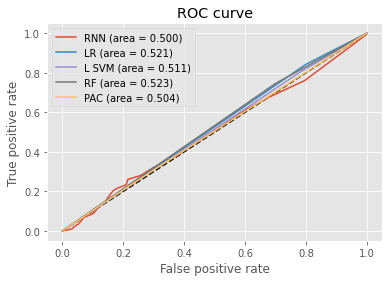

<Figure size 432x288 with 0 Axes>

In [116]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rnn, tpr_rnn, label='RNN (area = {:.3f})'.format(auc_rnn))
plt.plot(fpr_logReg, tpr_logReg, label='LR (area = {:.3f})'.format(auc_logReg))
plt.plot(fpr_svm, tpr_svm, label='L SVM (area = {:.3f})'.format(auc_svm))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.plot(fpr_pac, tpr_pac, label='PAC (area = {:.3f})'.format(auc_pac))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.savefig("ROC.PNG")